In [1]:
%load_ext autoreload
%autoreload 2

import logging
import numpy as np
from scipy.stats import ortho_group
from matplotlib import pyplot as plt
import seaborn as sns
from munch import Munch
import torch
from torch.distributions import Normal, Independent
from torch.utils.data import DataLoader
from pyro.nn import DenseNN
from pyro.distributions.transforms import AffineCoupling

from vaemcmc.models.encoders import EncoderMLP
from vaemcmc.models.decoders import DecoderMLP
from vaemcmc.vae import NormalNormalVAE, VAETarget, VAEProposal
from vaemcmc.mcmc import ISIRKernel
from vaemcmc.datasets.synthetic import SyntheticDataset
from vaemcmc.datasets.sampler import InfiniteSampler
from vaemcmc.trainer import Trainer
from vaemcmc.viz.synthetic import plot_kde, plot_chain, scatter
from vaemcmc.models.rnvp import RNVP, FlowML

from vaemcmc.distributions.synthetic import Ring
from vaemcmc.distributions.transforms import GaussianEmbedding

/Users/evgeny/miniconda3/envs/vaemcmc/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [37]:
args = Munch(
    amb_dim = 512,
    # manifold_dim = 16,
    lat_dim = 4,
    hidden_dim = 32,
    n_blocks = 2,
    n_particles = 25,
    n_chains = 10,
    burn_in = 500,
    n_samples = 1000,
    n_epoch = 35,
    dummy_noise_scale = 0.5,
)


In [58]:
xlim = (-7, 7)
ylim = (-7, 7)

PROJ = (0, 1)

manifold_target = Ring()
# transform = torch.randn(args.amb_dim, args.amb_dim)
target = GaussianEmbedding(manifold_target, args.amb_dim, noise_scale=args.dummy_noise_scale)
target.to(device)

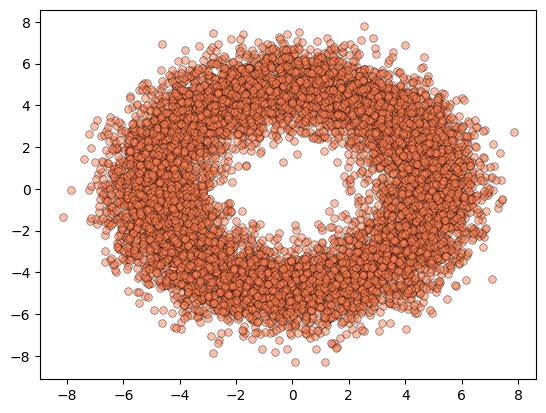

In [59]:
x = manifold_target.sample((10000,))
scatter(x);

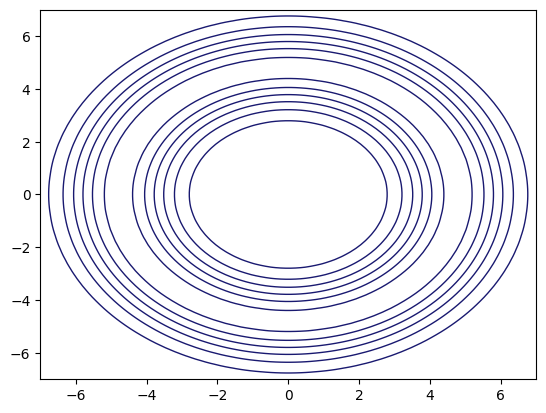

In [66]:
_, ax = plt.subplots() #subplot_kw=dict(projection='polar'))
target.plot_2d_contour(ax)
# ax.axis('auto')